## 連続型確率変数

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

from scipy import integrate , stats
from scipy.optimize import minimize_scalar
import warnings

#積分に関するwarningを出力しないようにする。
warnings.filterwarnings('ignore',category=integrate.IntegrationWarning)


!pip install japanize-matplotlib
import japanize_matplotlib #日本語化matplotlib
import seaborn as sns
sns.set(font="IPAexGothic") #日本語フォント設定

     |████████████████████████████████| 4.1MB 3.3MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.2-cp36-none-any.whl size=4120193 sha256=2815e069d834e782c0758e86f27b79760b0d0c4d0f2c85acb1d59665383d2da5
  Stored in directory: /root/.cache/pip/wheels/9c/f9/fc/bc052ce743a03f94ccc7fda73d1d389ce98216c6ffaaf65afc
Successfully built japanize-matplotlib


/usr/local/lib/python3.6/dist-packages/japanize_matplotlib/japanize_matplotlib.py:15: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


### 2次元の連続型確率変数


In [6]:
x_range = np.array([0,1])

In [7]:
#確率密度関数 f(x) = 2x(0≦x≦1) 

def f(x):
  if x_range[0] <= x and x_range[1] >= x:
    return 2 * x
  else:
    return 0

In [8]:
#Xは確率変数
X = [x_range , f]

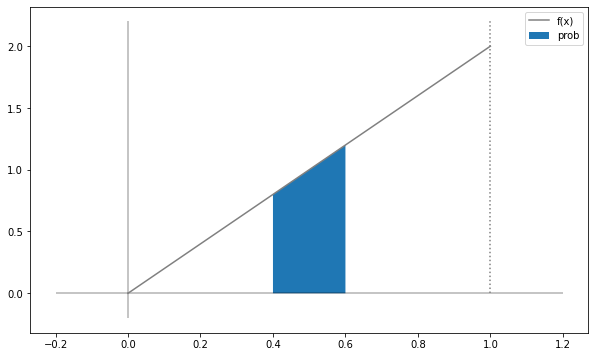

In [ ]:
#とりあえず図示してみる。
xs = np.linspace(x_range[0] , x_range[1] , 100)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.plot(xs , [f(x) for x in xs] , label='f(x)' , color='gray')
ax.hlines(0,-0.2 , 1.2 ,alpha=0.3)
ax.vlines(0,-0.2,  2.2,alpha = 0.3)
ax.vlines(xs.max() , 0 , 2.2 , linestyles=':', color='gray') 

xs = np.linspace(0.4 , 0.6 , 100)
ax.fill_between(xs , [f(x) for x in xs] , label = 'prob')
ax.legend()
plt.show()

In [ ]:
#積分して確率を求めてみる。
#第一引数が被積分関数。第２、第３引数が積分区間
integrate.quad(f , 0.4 , 0.6)

(0.200, 0.000)

In [ ]:
#関数の最小値を求める関数
from scipy.optimize import minimize_scalar
 
res = minimize_scalar(f)

#関数の最小値はfunというインスタンス変数に
res.fun

#f(x)の最小値は０であることが分かる。

0

### 累積分布関数

In [9]:
def F(x):
  return integrate.quad(f , -np.inf , x)[0]

In [ ]:
#累積分布関数を使用して確率を求める。
#0.4≦x≦0.6
F(0.6) - F(0.4)

0.200

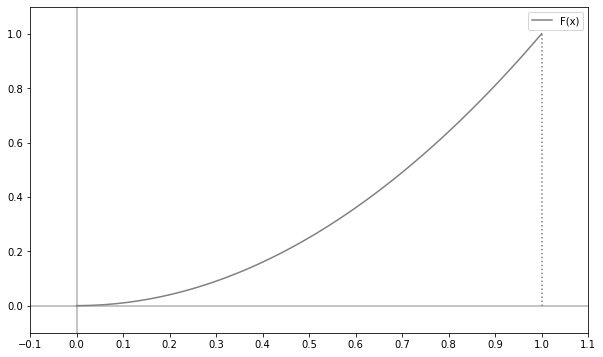

In [ ]:
#とりあえず図示してみる。
xs = np.linspace(x_range[0] , x_range[1] , 100)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.plot(xs , [F(x) for x in xs] , label='F(x)' , color='gray')
ax.hlines(0,-0.1 , 1.1 ,alpha=0.3)
ax.vlines(0,-0.1,  1.1,alpha = 0.3)
ax.vlines(xs.max() , 0 , 1 , linestyles=':', color='gray') 

ax.set_xticks(np.arange(-0.1 , 1.2  , 0.1))
ax.set_xlim(-0.1 , 1.1)
ax.set_ylim(-0.1 , 1.1)
ax.legend()
plt.show()

In [ ]:
#Y = 2X + 3の時のYの確率密度関数は
y_range = [3,5]

def g(y):
  if y_range[0] <= y <= y_range[1]:
    return (y - 3) / 2
  else:
    return 0

def G(y):
  return integrate.quad(g,-np.inf , y)[0]

### 期待値


In [10]:
def integrand(x):
  return x * f(x)

integrate.quad(integrand , -np.inf , np.inf)[0]

0.667

In [2]:
def E(X , g=lambda x:x):
  x_range , f = X
  def integrand(x):
    return g(x) * f(x)#fの関数はべつのところで定義している。gの関数は
  return integrate.quad(integrand , -np.inf , np.inf)[0]

In [11]:
E(X)

0.667

In [ ]:
E(X , g=lambda x:2*x+3)

4.333

### 分散


In [3]:
def V(X , g = lambda x:x):
  x_range , f = X
  mean = E(X ,g)
  def integrand(x):
    return (g(x) - mean) ** 2 * f(x)
  return integrate.quad(integrand , - np.inf , np.inf)[0]

In [ ]:
V(X)

0.056

In [ ]:
V(X , g=lambda x: 2 * x +3)

0.222

### 同時確率密度関数


In [ ]:
#今回はAの値を確率変数Y、AとBを足したものを確率変数Xとして考える
#0≦X≦2,0≦Y≦1

#同時確率密度関数
#f(x,y)=4y(x-y)(0<=y<=1 かつ　0<= x-y<=1)

x_range = [0,2]
y_range = [0,1]

def f_xy(x,y):
  if 0 <= y <= 1 and 0 <= x - y <= 1:
    return 4 * y * (x - y)
  else:
    return 0

In [ ]:
XY = [x_range , y_range , f_xy]

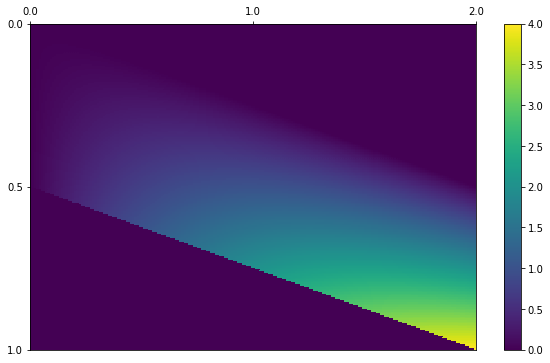

In [ ]:
#とりあえず図示してみる。
xs = np.linspace(x_range[0] , x_range[1] , 200)
ys = np.linspace(y_range[0] , y_range[1] , 200)
pd = np.array([[f_xy(x,y) for y in ys] for x in xs])

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

c = ax.pcolor(pd)
ax.set_xticks(np.linspace(0,200,3) , minor=False)
ax.set_yticks(np.linspace(0,200,3) , minor=False)
ax.set_xticklabels(np.linspace(0,2,3))
ax.set_yticklabels(np.linspace(0,1,3))
ax.invert_yaxis()
ax.xaxis.tick_top()
fig.colorbar(c , ax=ax)
plt.show()

### 周辺確率密度関数
周辺確率密度関数は、XやYのみの確率密度関数のこと。


In [ ]:
from functools import partial
#particalは引数の一部を固定した新しい関数を作成することが出来る関数。
#例えばpartical(f_xy , x)とした場合f_xyの引数のうちxが固定され、yのみになった関数が返ってくる。

def f_X(x):
  return integrate.quad(partial(f_xy , x) , -np.inf , np.inf)[0]#yで積分することによってｘのみが残りそれがｘの確率密度関数となる。

def f_Y(y):
  return integrate.quad(partial(f_xy , y=y) , -np.inf , np.inf)[0]



In [ ]:
X = [x_range , f_X]
Y = [y_range , f_Y]

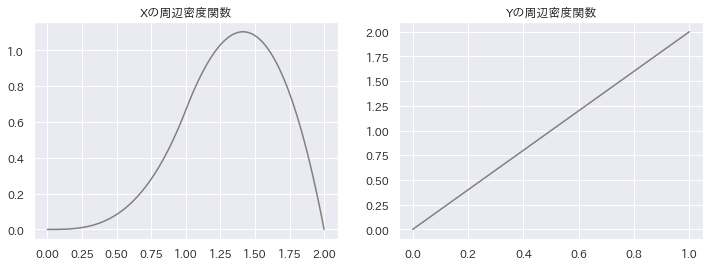

In [ ]:
xs = np.linspace(*x_range , 100)
ys = np.linspace(*y_range , 100)

fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(xs , [f_X(x) for x in xs] , color ='gray')
ax2.plot(ys , [f_Y(y) for y in ys] , color ='gray')

ax1.set_title('Xの周辺密度関数')
ax2.set_title('Yの周辺密度関数')

plt.show()

### 期待値


In [ ]:
def E(XY , g):
  x_range , y_range , f_xy = XY
  def integrand(x , y):
    return g(x ,y) * f_xy(x, y)#g(x,y)もしくはyが返ってくる。

  
  return integrate.nquad(integrand , [[-np.inf , np.inf] , [-np.inf , np.inf]])[0]

In [ ]:
mean_X = E(XY , lambda x , y :x)
mean_X

1.333

In [ ]:
mean_Y = E(XY , lambda x , y :y)
mean_Y

0.667

### 分散

In [ ]:
def V(XY , g):
  x_range , y_range , f_xy = XY
  mean = E(XY , g)
  def integrand(x , y):
    return (g(x ,y)-mean)**2 * f_xy(x, y)#g(x,y)もしくはyが返ってくる。

  
  return integrate.nquad(integrand , [[-np.inf , np.inf] , [-np.inf , np.inf]])[0]

In [ ]:
var_X = V(XY , lambda x,y:x)
var_X

0.111

In [ ]:
var_Y = V(XY , lambda x,y:y)
var_Y

0.056

In [ ]:
def Cov(XY):
  x_range , y_range , f_xy = XY
  mean_X = E(XY , lambda x ,y : x)
  mean_Y = E(XY , lambda x ,y : y)
  def integrand(x,y):
    return (x-mean_X) * (y - mean_Y) * f_xy(x ,y)

  return integrate.nquad(integrand , [[-np.inf , np.inf] , [-np.inf , np.inf]])[0]




In [ ]:
cov_xy = Cov(XY)
cov_xy

0.056

### 相関係数


In [ ]:
cov_xy / np.sqrt(var_X *var_Y)

0.707

## 連続確率分布


In [14]:
linestyles = ['-' , '--' , ':']

def E(X , g=lambda x:x):
  x_range , f = X
  def integrand(x):
    return g(x) * f(x)#fの関数はべつのところで定義している。gの関数は
  return integrate.quad(integrand , -np.inf , np.inf)[0]

def V(X , g = lambda x:x):
  x_range , f = X
  mean = E(X ,g)
  def integrand(x):
    return (g(x) - mean) ** 2 * f(x)
  return integrate.quad(integrand , - np.inf , np.inf)[0]

def check_prob(X):
  x_range , f = X
  f_min = minimize_scalar(f).fun
  assert f_min >= 0, '密度関数が負の値をとります'
  prob_sum = np.round(integrate.quad(f , -np.inf , np.inf )[0] , 6)
  assert prob_sum == 1 , f'確率の和が{prob_sum}になりました。'
  print(f'期待値は{E(X):.3f}')
  print(f'分散は{V(X):.3f}')


def plot_prob(X , x_min , x_max):
  x_range , f = X
  def F(x):
    return integrate.quad(f , - np.inf , x)[0]
  
  xs = np.linspace(x_min , x_max , 100)

  fig = plt.figure(figsize=(10 ,6))
  ax = fig.add_subplot(111)
  ax.plot(xs , [f(x) for x in xs] , label = 'f(x)' , color = 'gray')
  ax.plot(xs , [F(x) for x in xs] , label = 'F(x)' , ls='--' ,color = 'gray')
  ax.legend()
  plt.show()
 

### 正規分布
正規分布は統計解析において最も重要といえる確率分布。<br>
パラメタは平均μと分散$σ^2$になる。<br>
正規分布の表示としては$N(μ,σ^2)$と表記される。<br>
Xが正規分布に従うのであればaX+bも正規分布に従う（a,bは実数）

In [15]:
def N(mu , sigma):
  x_range = [-np.inf , np.inf]
  def f(x):
    return 1 / np.sqrt(2 * np.pi * sigma**2) * np.exp(-(x-mu)**2 / (2 * sigma**2))#正規分布の確率密度関数
  return x_range , f

In [16]:
#平均３、標準偏差0.5を考える
#N(3 , 0.5^2)
mu  = 3
sigma = 0.5
X = N(mu , sigma)
X

([-inf, inf], <function __main__.N.<locals>.f>)

In [20]:
check_prob(X)

期待値は3.000
分散は0.250


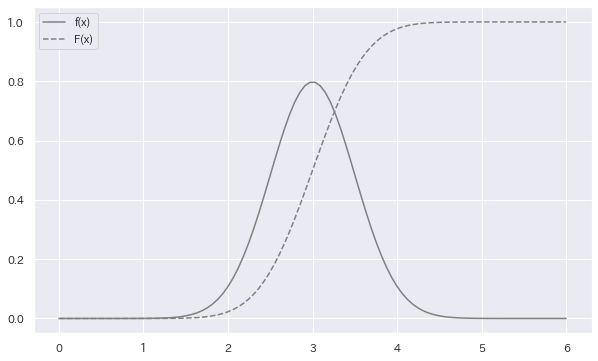

In [21]:
plot_prob(X , 0 , 6)

In [23]:
rv = stats.norm(3 , 0.5)
rv.mean() , rv.var()

(3.000, 0.250)

In [25]:
rv.pdf(3)#確率密度関数

0.798

In [26]:
#分布関数
#x以下の面積を求める
#rv.cdf(x)
rv.cdf(3)#ちょうど平均のところなので確率は0.5,P(x≦3)を表している

0.500

In [28]:
#上側α％の面積を満たすx座標を求める
#rv.isf(α)
#今回上側50％のところのx座標を求めているので3が出力される
rv.isf(0.5)

3.000

In [29]:
#信頼区間を求める。
#確率がαとなる信頼区間を求めることが出来る。
#rv.interval(α)
#今回は信頼区間90％を求めてみている
rv.interval(0.9)

(2.178, 3.822)

In [30]:
rv.isf(0.95) ,rv.isf(0.05) 

(3.822, 2.178)

### 指数分布
指数分布はある事象が発生する間隔が従う分布<br>
λは単位時間当たり平均λ回発生する事象の発生間隔が従う確率分布<br>
$f(x) = λe^{-λe}$(x≧0)…確率密度関数<br>
例：<br>
一時間あたり平均10アクセスあるサイトへのアクセス間隔<br>
一日あたり平均2件の交通事故が発生する地域における一日の交通事故発生間隔<br>
<br>
ポアソン分布と指数分布の違い<br>
単位時間あたり平均λ回発生するイベントに対し、<br>
ポアソン分布→単位時間あたりにイベントが発生する「回数」が従う分布<br>
指数分布→単位時間あたりにイベントの「発生間隔」が従う分布


In [31]:
#指数分布
def Ex(lam):
  x_range = [0,np.inf]
  def f(x):
    if x>= 0:
      return lam * np.exp(-lam*x)
    else:
      return 0
  return x_range , f

In [32]:
lam = 3
X = Ex(lam)
check_prob(X)

期待値は0.333
分散は0.111


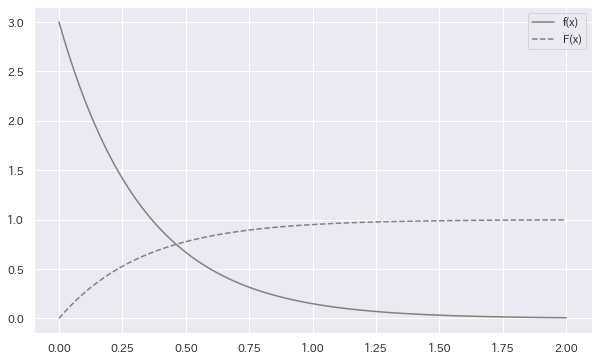

In [33]:
plot_prob(X , 0 , 2)

### カイ2乗分布
カイ2乗分布は分散の区間推定や独立性の検定で使用される確率分布<br>
$Z_1,Z_2,.....Z_n$が互いに独立にN(0，1)（標準正規分布）に従っている時,その二乗和<br>
$Y=\sum_{i=1}^{n}Z_i^{2}$の確率分布を自由度ｎのカイ2乗分布という。

In [37]:
n = 10
rv = stats.norm()
sample_size = int(1e6)
#標準正規分布からサンプルサイズ10で無作為抽出を行い、その二乗和をとる。
#この作業を100万回行う。
Zs_sample = rv.rvs((n , sample_size))#rvsは無作為抽出
#標準正規分布の二乗和の標本データを得る。
chi2_sample = np.sum(Zs_sample**2 , axis = 0)



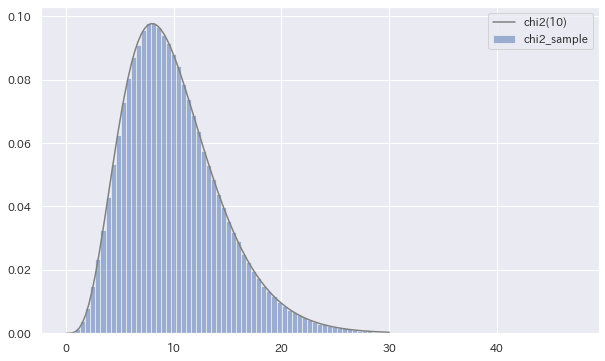

In [39]:
fig = plt.figure(figsize=(10 ,6))
ax = fig.add_subplot(111)

rv_true = stats.chi2(n)
xs = np.linspace(0 , 30 , 100)
ax.hist(chi2_sample , bins = 100 , density=True , alpha=0.5 , label='chi2_sample')
ax.plot(xs , rv_true.pdf(xs) , label=f'chi2({n})' , color='gray')  
  
ax.legend()
plt.show()
#自由度10のカイ2乗分布となっている。

### t分布
t分布は正規分布の母平均の区間推定などに使用される確率分布。t分布は互いに独立な標準正規分布とカイ2乗分布によって次のように定義される。<br>
確率変数Z,Yは互いに独立で、Zは標準正規分布N(0,1)にYは自由度nのカイ二乗分布$X^2(n)$にそれぞれ従うとき,<br>
$t = \frac{Z}{\sqrt{Y/n}}$の確率分布を自由度ｎのt分布という。<br>


In [40]:
#カイ2乗分布でt分布の作成を行う。
#Z~N(0,1)
#Y~X^2(10)
#これらを使用して、無作為抽出を行う。
n = 10
rv1 = stats.norm()
rv2 = stats.chi2(n)


sample_size = int(1e6)
Z_sample = rv1.rvs(sample_size)
chi2_sample = rv2.rvs(sample_size)

t_sample = Z_sample / np.sqrt(chi2_sample/n)

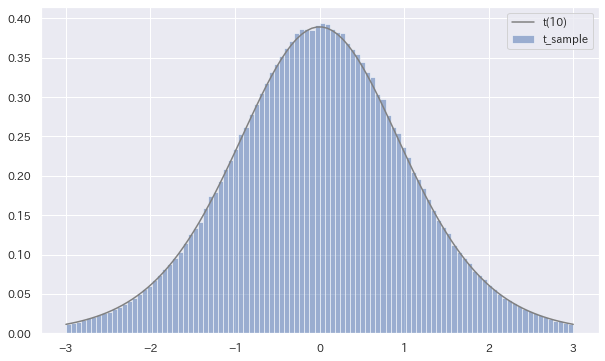

In [41]:
#今回自由度10のカイ二乗分布を使用したので自由度10のt分布が出来ている。

fig = plt.figure(figsize=(10 ,6))
ax = fig.add_subplot(111)

rv = stats.t(n)
xs = np.linspace(-3 , 3 , 100)
ax.hist(t_sample , bins = 100 , range=(-3,3),density=True , alpha=0.5 , label='t_sample')
ax.plot(xs , rv.pdf(xs) , label=f't({n})' , color='gray')  
  
ax.legend()
plt.show()

### F分布
F分布は分散分析などで使用される確率分布。<br>
F分布は互いに独立な2つのカイ2乗分布によって定義される。<br>
確率変数$Y_1,Y_2$は互いに独立で、それぞれ$Y_1→X^2(n_1),Y_2→X^2(n_2)$に従うとき,<br>
$F=\frac{Y_1/n_1}{Y_2/n_2}$の確率分布を自由度（$n_1 , n_2$）のF分布$F(n_1,n_2)$という。

In [44]:
n1 = 5
n2 = 10
rv1 = stats.chi2(n1)
rv2 = stats.chi2(n2)

sample_size = int(1e6)
sample1 = rv1.rvs(sample_size)
sample2 = rv2.rvs(sample_size)

f_sample = (sample1/n1) / (sample2/n2)

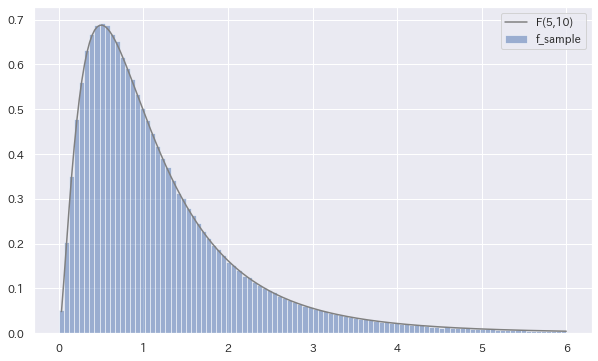

In [45]:
#F(5,10)の確率密度関数
fig = plt.figure(figsize=(10 ,6))
ax = fig.add_subplot(111)

rv = stats.f(n1,n2)
xs = np.linspace(0 , 6 , 200)[1:]
ax.hist(f_sample , bins = 100 , range=(0,6),density=True , alpha=0.5 , label='f_sample')
ax.plot(xs , rv.pdf(xs) , label=f'F({n1},{n2})' , color='gray')  
  
ax.legend()
plt.show()